# Multi-Linear Regression

### 1. Taking “Estimated Shares Outstanding” as the dependent variable, perform multiple linear regression on every other variable except - Period Ending, Total Revenue.
### 2. Taking “Total Revenue” as the dependent variable, perform multiple linear regression on every other variable except - Period Ending, Estimated Shares Outstanding.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("fundamentals.csv")
df.head(5)

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000,-1961000000,23,-1888000000,4.695000e+09,53.0,...,7.072000e+09,9011000000,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000,-2723000000,67,-3114000000,1.059200e+10,75.0,...,1.432300e+10,13806000000,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000,-150000000,143,-5311000000,1.513500e+10,60.0,...,1.175000e+10,13404000000,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000,-708000000,135,-6151000000,1.159100e+10,51.0,...,9.985000e+09,13605000000,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000,600000,32,-271182000,5.202150e+08,23.0,...,3.184200e+09,2559638000,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


### Data preprocessing

In [3]:
df.shape

(1781, 79)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   int64  
 5   Add'l income/expense items                           1781 non-null   int64  
 6   After Tax ROE                                        1781 non-null   int64  
 7   Capital Expenditures                                 1781 non-null   int64  
 8   Capital Surplus                                      1781 non-null  

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

Unnamed: 0                      1781
Ticker Symbol                    448
Period Ending                    162
Accounts Payable                1676
Accounts Receivable             1329
                                ... 
Total Revenue                   1742
Treasury Stock                  1015
For Year                           6
Earnings Per Share               744
Estimated Shares Outstanding    1558
Length: 79, dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

###### Renaming unlabeled column

In [8]:
df.rename(columns={df.columns[0]:'Si.No'}, inplace=True)
df.head(5)

,Si.No,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000,-1961000000,23,-1888000000,4.695000e+09,53.0,...,7.072000e+09,9011000000,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000,-2723000000,67,-3114000000,1.059200e+10,75.0,...,1.432300e+10,13806000000,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000,-150000000,143,-5311000000,1.513500e+10,60.0,...,1.175000e+10,13404000000,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000,-708000000,135,-6151000000,1.159100e+10,51.0,...,9.985000e+09,13605000000,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000,600000,32,-271182000,5.202150e+08,23.0,...,3.184200e+09,2559638000,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


##### Dropping unrelated columns

In [9]:
df=df.drop(["Si.No","Period Ending"], axis = 1)

In [10]:
df.shape

(1781, 77)

### Replacing null values with mean for the below columns 
##### Cash Ratio ,Current Ratio  ,Quick Ratio , For Year ,Earnings Per Share , Estimated Shares Outstanding                              

In [11]:
CR_avg = df["Cash Ratio"].mean()
print(CR_avg)
df["Cash Ratio"].replace(np.nan, CR_avg, inplace = True)

74.4574898785425


In [12]:
Cr_avg = df["Current Ratio"].mean()
print(Cr_avg)
df["Current Ratio"].replace(np.nan, Cr_avg, inplace = True)

186.77125506072875


In [13]:
QR_avg = df["Quick Ratio"].mean()
print(QR_avg)
df["Quick Ratio"].replace(np.nan, QR_avg, inplace = True)

146.9527665317139


In [14]:
FR_avg = df["For Year"].mean()
print(round(FR_avg))
df["For Year"].replace(np.nan, FR_avg, inplace = True)

2013


In [15]:
ERS_avg = df["Earnings Per Share"].mean()
print(ERS_avg)
df["Earnings Per Share"].replace(np.nan,ERS_avg, inplace = True)

3.353706786171575


In [16]:
ESO_avg = df["Estimated Shares Outstanding"].mean()
print(ESO_avg)
df["Estimated Shares Outstanding"].replace(np.nan,ESO_avg, inplace = True)

602424367.6541101


#### Counting number of zero values in dataset

In [17]:
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    print(column_name, ":" ,count)

Ticker Symbol : 0
Accounts Payable : 46
Accounts Receivable : 193
Add'l income/expense items : 305
After Tax ROE : 7
Capital Expenditures : 67
Capital Surplus : 257
Cash Ratio : 13
Cash and Cash Equivalents : 0
Changes in Inventories : 640
Common Stocks : 101
Cost of Revenue : 107
Current Ratio : 0
Deferred Asset Charges : 1032
Deferred Liability Charges : 577
Depreciation : 13
Earnings Before Interest and Tax : 0
Earnings Before Tax : 0
Effect of Exchange Rate : 589
Equity Earnings/Loss Unconsolidated Subsidiary : 1239
Fixed Assets : 51
Goodwill : 371
Gross Margin : 71
Gross Profit : 71
Income Tax : 29
Intangible Assets : 524
Interest Expense : 269
Inventory : 550
Investments : 363
Liabilities : 45
Long-Term Debt : 156
Long-Term Investments : 746
Minority Interest : 839
Misc. Stocks : 1510
Net Borrowings : 109
Net Cash Flow : 2
Net Cash Flow-Operating : 0
Net Cash Flows-Financing : 1
Net Cash Flows-Investing : 0
Net Income : 0
Net Income Adjustments : 8
Net Income Applicable to Common

In [18]:
df["Ticker Symbol"].unique()

array(['AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ADBE', 'ADI', 'ADM',
       'ADS', 'ADSK', 'AEE', 'AEP', 'AFL', 'AIG', 'AIV', 'AIZ', 'AJG',
       'AKAM', 'ALB', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AME', 'AMG',
       'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'ANTM', 'AON', 'APA', 'APC',
       'APD', 'APH', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP',
       'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBBY', 'BBT', 'BBY', 'BCR',
       'BDX', 'BHI', 'BIIB', 'BK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C',
       'CAG', 'CAH', 'CAT', 'CB', 'CBG', 'CCI', 'CCL', 'CELG', 'CERN',
       'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL',
       'CLX', 'CMA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF',
       'COG', 'COL', 'COO', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSRA',
       'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D',
       'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS',
       'DISCA', 'DISCK', 'DLPH', 'DLR', 'DLTR', 'DNB', 'DOV', 'DPS',


### VISUALISATION

<AxesSubplot:xlabel='Sale and Purchase of Stock', ylabel='Total Revenue'>

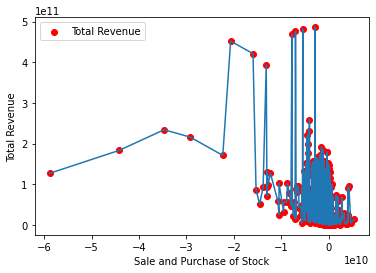

In [19]:
plt.scatter(x='Sale and Purchase of Stock',y='Total Revenue',color="red",data=df)
sns.lineplot(x='Sale and Purchase of Stock',y='Total Revenue',data=df)


<AxesSubplot:xlabel='Sales, General and Admin.', ylabel='Total Revenue'>

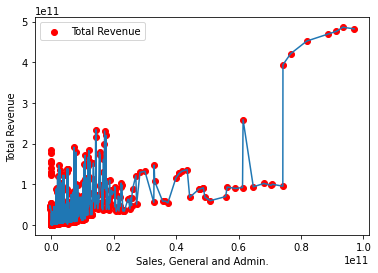

In [20]:
plt.scatter(x='Sales, General and Admin.',y='Total Revenue',color="red",data=df)
sns.lineplot(x='Sales, General and Admin.',y='Total Revenue',data=df)

<AxesSubplot:xlabel="Add'l income/expense items", ylabel='Total Revenue'>

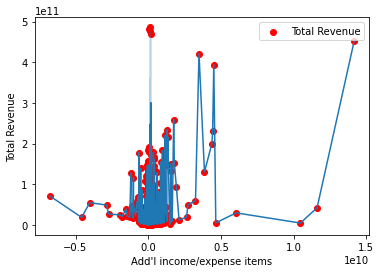

In [21]:
plt.scatter(x="Add'l income/expense items",y='Total Revenue',color="red",data=df)
sns.lineplot(x="Add'l income/expense items",y='Total Revenue',data=df)

<AxesSubplot:xlabel='Sale and Purchase of Stock', ylabel='Estimated Shares Outstanding'>

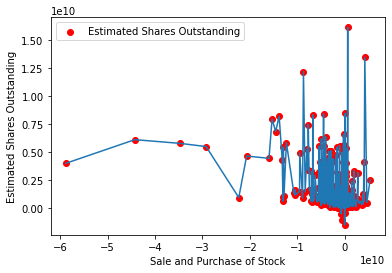

In [22]:
plt.scatter(x='Sale and Purchase of Stock',y='Estimated Shares Outstanding',color="red",data=df)
sns.lineplot(x='Sale and Purchase of Stock',y='Estimated Shares Outstanding',data=df)

<AxesSubplot:xlabel='Sales, General and Admin.', ylabel='Estimated Shares Outstanding'>

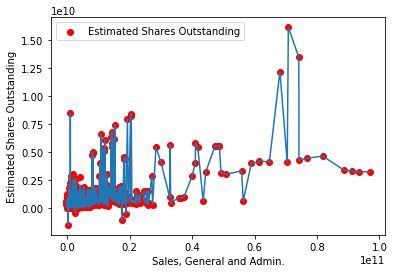

In [23]:
plt.scatter(x='Sales, General and Admin.',y='Estimated Shares Outstanding',color="red",data=df)
sns.lineplot(x='Sales, General and Admin.',y='Estimated Shares Outstanding',data=df)

<AxesSubplot:xlabel="Add'l income/expense items", ylabel='Estimated Shares Outstanding'>

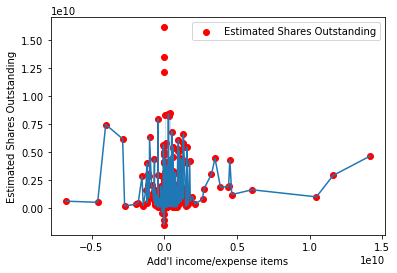

In [24]:
plt.scatter(x="Add'l income/expense items",y='Estimated Shares Outstanding',color="red",data=df)
sns.lineplot(x="Add'l income/expense items",y='Estimated Shares Outstanding',data=df)

In [25]:
df.corr()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
Accounts Payable,1.000000,0.081888,0.147349,-0.017929,-0.270014,0.449122,-0.059948,0.802662,-0.128715,0.466341,...,0.319780,0.396188,0.790729,0.817137,0.830755,0.542153,-0.233924,-0.005210,0.065572,0.579223
Accounts Receivable,0.081888,1.000000,-0.038108,0.007046,0.044149,0.124598,-0.018360,0.123222,0.116394,-0.029331,...,-0.164333,-0.146215,0.134171,0.153344,0.154151,-0.069595,-0.089944,0.014502,-0.044104,-0.035918
Add'l income/expense items,0.147349,-0.038108,1.000000,-0.009108,-0.380987,0.015707,0.017896,0.030089,-0.077841,0.061892,...,0.225894,0.260731,0.241839,0.037087,0.063763,0.283222,-0.329723,0.003641,0.092169,0.143569
After Tax ROE,-0.017929,0.007046,-0.009108,1.000000,0.020522,-0.033664,0.015090,-0.019266,0.025754,-0.015461,...,-0.012883,-0.010520,-0.055656,-0.025989,-0.030297,-0.022997,0.001135,0.002264,-0.038091,-0.025126
Capital Expenditures,-0.270014,0.044149,-0.380987,0.020522,1.000000,-0.216391,0.104984,0.005775,0.116332,-0.114543,...,-0.481808,-0.601546,-0.477256,-0.068129,-0.121560,-0.630035,0.477219,-0.007883,-0.017888,-0.371190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total Revenue,0.542153,-0.069595,0.283222,-0.022997,-0.630035,0.243625,-0.113932,0.173220,-0.273393,0.210819,...,0.631283,0.768625,0.555411,0.264011,0.306571,1.000000,-0.467167,0.008929,0.131975,0.459212
Treasury Stock,-0.233924,-0.089944,-0.329723,0.001135,0.477219,-0.162355,0.062152,-0.041174,0.143621,-0.189223,...,-0.331185,-0.438639,-0.353789,-0.099276,-0.133763,-0.467167,1.000000,-0.007345,-0.118430,-0.297403
For Year,-0.005210,0.014502,0.003641,0.002264,-0.007883,0.006402,0.017058,0.001500,-0.005685,0.004293,...,0.001755,-0.003917,0.007815,0.002273,0.003030,0.008929,-0.007345,1.000000,0.012000,0.004065
Earnings Per Share,0.065572,-0.044104,0.092169,-0.038091,-0.017888,-0.038183,0.022940,0.012250,-0.066183,0.036984,...,0.087122,0.093968,0.072344,0.017898,0.025189,0.131975,-0.118430,0.012000,1.000000,-0.050840


### Modelling

#### 1. Taking “Estimated Shares Outstanding” as the dependent variable, perform multiple linear regression on every other variable except - Period Ending, Total Revenue.

In [26]:
X=df
X=X.drop(["Total Revenue"], axis = 1)
X=X.drop(["Ticker Symbol"], axis = 1) # dropping Ticket symbol...converting using one hotencoding but the side of array is too large 
X=X.values
print(X)
print(X[0])

[[ 3.06800000e+09 -2.22000000e+08 -1.96100000e+09 ...  2.01200000e+03
  -5.60000000e+00  3.35000000e+08]
 [ 4.97500000e+09 -9.30000000e+07 -2.72300000e+09 ...  2.01300000e+03
  -1.12500000e+01  1.63022222e+08]
 [ 4.66800000e+09 -1.60000000e+08 -1.50000000e+08 ...  2.01400000e+03
   4.02000000e+00  7.16915423e+08]
 ...
 [ 1.07100000e+09  6.90000000e+07 -7.00000000e+06 ...  2.01400000e+03
   1.16000000e+00  5.02586207e+08]
 [ 1.31300000e+09 -5.80000000e+07 -8.10000000e+07 ...  2.01500000e+03
   6.80000000e-01  4.98529412e+08]
 [ 1.07600000e+09  1.50000000e+07  2.00000000e+06 ...  2.01330535e+03
   3.35370679e+00  6.02424368e+08]]
[ 3.0680e+09 -2.2200e+08 -1.9610e+09  2.3000e+01 -1.8880e+09  4.6950e+09
  5.3000e+01  1.3300e+09  0.0000e+00  1.2700e+08  1.0499e+10  7.8000e+01
  0.0000e+00  2.2300e+08  1.0010e+09 -1.8130e+09 -2.4450e+09  0.0000e+00
  0.0000e+00  1.3402e+10  0.0000e+00  5.8000e+01  1.4356e+10 -5.6900e+08
  8.6900e+08  6.3200e+08  5.8000e+08  3.0600e+08  4.7300e+08  7.1160e+09

In [28]:
Y=df["Total Revenue"]
Y.values

array([2.4855e+10, 2.6743e+10, 4.2650e+10, ..., 4.7850e+09, 4.7650e+09,
       4.8880e+09])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=3)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1246, 75)
(535, 75)
(1246,)
(535,)


In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [32]:
regressor.predict(X_test)

array([ 1.49057427e+11,  4.73731856e+09,  7.19509608e+09,  2.78752395e+09,
        8.81031898e+09,  1.44902447e+10,  9.95831433e+09,  1.21330739e+10,
        4.76410991e+11,  5.76325091e+09,  1.88412991e+10,  1.03131799e+10,
        6.83477887e+09,  1.02428313e+10,  5.57259787e+09,  4.44230246e+10,
        9.89780461e+10,  3.58865084e+09,  6.15529514e+09,  4.50378600e+09,
        9.88365635e+09,  5.52282245e+09,  1.70656147e+10,  6.11385949e+09,
        1.24051862e+10,  2.38268892e+09,  3.74744018e+09,  6.27086895e+09,
        2.09235876e+09,  1.37764102e+10,  1.16496113e+10,  2.38076767e+10,
        1.05620137e+11,  5.56754490e+10,  2.51129252e+09,  3.55764962e+09,
        5.41320996e+10,  1.76895785e+09,  1.79197177e+10,  9.61723290e+09,
        1.11877666e+10,  7.70004578e+09,  8.21016579e+09,  1.67855401e+09,
        2.39341210e+09,  4.12444917e+10,  8.55738852e+09,  1.52529486e+11,
        4.01913022e+10,  1.01352722e+10,  1.71366797e+09,  6.11890022e+09,
        1.61110657e+11,  

In [33]:
regressor.coef_

array([-1.67583029e-01,  2.13718602e-01, -8.81309585e-01, -4.69111042e+05,
        3.84939680e-02,  4.46003695e-02,  1.73531565e+06, -1.51130270e-02,
        2.49282969e-01,  3.53093798e-02,  1.00473889e+00, -4.98324354e+05,
        4.70512319e-02, -1.80228816e-01,  6.21825877e-02,  7.95395104e+00,
       -7.04460846e+00, -1.69743521e-01, -1.01321679e+00,  5.36918959e-02,
        6.81814746e-02,  1.06792403e+06,  5.86235443e-01,  4.49786515e-02,
        5.04174803e-02, -7.66702036e+00,  9.93854799e-02, -1.82289433e-02,
        1.66903696e-01, -1.78896599e-01,  1.19729915e-02, -1.67571231e-01,
       -2.64871063e-01,  8.92179979e-02,  1.15694957e-02,  2.44637771e-02,
       -5.56609163e-02,  4.89313403e-02, -1.53413466e-01,  1.58531499e-01,
        3.09494922e-01,  3.98363750e-02,  1.10067664e-01,  3.63079793e-01,
       -5.84241651e-01, -8.22383627e+06,  3.01624925e-02,  4.63768337e-02,
       -1.23288954e-01,  4.96516622e-02,  7.30540355e-02, -5.94874949e-03,
       -1.53373804e-01, -

In [34]:
regressor.intercept_

199363549.14995956

In [35]:
regressor.score(X_train,Y_train)

0.9998016448011009

In [36]:
regressor.score(X_test,Y_test)

0.9931356949152622

In [37]:
from sklearn.metrics import r2_score
r2_score(regressor.predict(X_test),Y_test)

0.9931467540648682

In [38]:
df2=pd.DataFrame()
df2["Actual_value"]=Y_test
df2["Predicted_value"]=regressor.predict(X_test)

In [39]:
df2

,Actual_value,Predicted_value
608,1.470000e+11,1.490574e+11
1433,5.266103e+09,4.737319e+09
1737,7.232397e+09,7.195096e+09
1502,2.665000e+09,2.787524e+09
603,8.773564e+09,8.810319e+09
...,...,...
243,8.305100e+09,8.313403e+09
1123,4.608563e+09,4.875873e+09
448,1.602213e+10,1.620527e+10
1541,1.492000e+09,1.703608e+09


#### 2. Taking “Total Revenue” as the dependent variable, perform multiple linear regression on every other variable except - Period Ending, Estimated Shares Outstanding.

In [40]:
X=df.iloc[:,1:-1].values
Y=df.iloc[:,-1].values
print(X)
print(Y)
print(X[0])

[[ 3.06800000e+09 -2.22000000e+08 -1.96100000e+09 ... -3.67000000e+08
   2.01200000e+03 -5.60000000e+00]
 [ 4.97500000e+09 -9.30000000e+07 -2.72300000e+09 ...  0.00000000e+00
   2.01300000e+03 -1.12500000e+01]
 [ 4.66800000e+09 -1.60000000e+08 -1.50000000e+08 ...  0.00000000e+00
   2.01400000e+03  4.02000000e+00]
 ...
 [ 1.07100000e+09  6.90000000e+07 -7.00000000e+06 ...  0.00000000e+00
   2.01400000e+03  1.16000000e+00]
 [ 1.31300000e+09 -5.80000000e+07 -8.10000000e+07 ... -2.03000000e+08
   2.01500000e+03  6.80000000e-01]
 [ 1.07600000e+09  1.50000000e+07  2.00000000e+06 ... -4.21000000e+08
   2.01330535e+03  3.35370679e+00]]
[3.35000000e+08 1.63022222e+08 7.16915423e+08 ... 5.02586207e+08
 4.98529412e+08 6.02424368e+08]
[ 3.0680e+09 -2.2200e+08 -1.9610e+09  2.3000e+01 -1.8880e+09  4.6950e+09
  5.3000e+01  1.3300e+09  0.0000e+00  1.2700e+08  1.0499e+10  7.8000e+01
  0.0000e+00  2.2300e+08  1.0010e+09 -1.8130e+09 -2.4450e+09  0.0000e+00
  0.0000e+00  1.3402e+10  0.0000e+00  5.8000e+01

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state=5)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1335, 75)
(446, 75)
(1335,)
(446,)


In [43]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [44]:
regression.coef_

array([-1.99821210e-02, -7.96467629e-02,  2.34034661e-01,  2.88068819e+05,
        2.09640321e-03,  8.47529385e-03,  3.22645180e+05, -2.49537280e-03,
       -3.22889543e-02, -1.51145582e-02, -4.23340644e-02,  3.60010965e+04,
       -7.32756938e-03, -9.30904507e-03, -1.68628233e-02, -9.45738950e-01,
        3.79565270e-01, -5.49618719e-01,  2.34745536e-01,  1.80502152e-03,
        1.25729732e-03, -6.59210229e+05, -4.52085454e-02,  1.95587789e-01,
        4.45364407e-03,  7.12503072e-01, -5.15244258e-03, -3.31186017e-02,
       -5.97328196e-02, -3.95605805e-02, -7.18993401e-03, -2.32895413e-03,
        1.76707958e-02,  7.83492759e-02, -6.98011954e-03,  2.37620834e-02,
       -1.09568807e-01,  5.04620426e-03, -7.39363768e-02, -5.94266257e-02,
        1.76566862e-01,  1.21386459e-01, -1.43057317e-04,  4.32184652e-02,
        3.86605292e-01, -2.32144746e+06, -1.03229767e-02, -4.91959391e-03,
       -1.58097698e-02,  9.06578056e-03,  8.67492807e-02, -2.96643814e-02,
       -1.62228806e-02, -

In [45]:
regression.intercept_

222824399.851583

In [46]:
regression.predict(X_test)

array([ 7.23243827e+08,  3.90528001e+08,  2.91951494e+08,  8.06264115e+08,
        4.26908247e+08,  2.84415000e+08, -1.11775770e+09,  5.16238963e+08,
       -8.54893425e+06,  1.49635984e+08,  4.00212988e+08,  4.65937193e+08,
        8.86138258e+08,  6.74789324e+08,  1.74215787e+08,  3.48509036e+08,
        4.67975255e+08,  3.20437634e+08,  4.82304565e+08,  1.43324678e+08,
        9.72081441e+08,  5.37008614e+08,  8.86104526e+08,  2.44107442e+08,
        2.24176784e+08,  6.44681585e+08,  8.16770631e+08,  5.70528655e+08,
        3.49479953e+08,  1.29509229e+09,  8.93207146e+08,  1.00177891e+09,
        1.98836699e+08,  1.57625406e+09,  9.62418442e+09,  5.62257309e+08,
        7.36026817e+08,  6.15993177e+08,  1.69686807e+08,  4.62581272e+08,
        2.04474835e+08,  4.19046555e+08,  5.00862178e+08,  1.76172359e+08,
        3.17157624e+08,  2.62724424e+08,  6.49126219e+08,  2.78392374e+08,
        2.32013854e+08,  2.45173713e+08,  2.13350417e+08,  3.39524589e+08,
        6.45145038e+08,  

In [47]:
regression.score(X_train,Y_train)

0.8708525054776913

In [48]:
regression.score(X_test,Y_test)

0.5981266863734804

In [49]:
from sklearn.metrics import r2_score
r2_score(regression.predict(X_test),Y_test)

0.5560906436378237

In [50]:
df2=pd.DataFrame()
df2["Actual_value"]=Y_test
df2["Predicted_value"]=regression.predict(X_test)

In [51]:
df2

,Actual_value,Predicted_value
0,4.566667e+08,7.232438e+08
1,1.486392e+08,3.905280e+08
2,6.024244e+08,2.919515e+08
3,5.486869e+08,8.062641e+08
4,6.527778e+08,4.269082e+08
...,...,...
441,3.140541e+08,5.634027e+08
442,2.881667e+09,5.897287e+08
443,1.163023e+09,8.777521e+08
444,1.480643e+08,4.527676e+08
